1/1 [==============================] - 4s 4s/step
Epoch: 1, Discriminator Loss: 1.4938727617263794, Generator Loss: 0.46814578771591187
1/1 [==============================] - 0s 16ms/step
Epoch: 2, Discriminator Loss: 0.6857544034719467, Generator Loss: 0.7357050180435181
1/1 [==============================] - 0s 15ms/step
Epoch: 3, Discriminator Loss: 0.7166857421398163, Generator Loss: 0.7987725138664246
1/1 [==============================] - 0s 15ms/step
Epoch: 4, Discriminator Loss: 0.7228522598743439, Generator Loss: 0.8025392889976501
1/1 [==============================] - 0s 15ms/step
Epoch: 5, Discriminator Loss: 0.703220397233963, Generator Loss: 0.8043141961097717
1/1 [==============================] - 0s 21ms/step
Epoch: 6, Discriminator Loss: 0.6754700243473053, Generator Loss: 0.8488826155662537
1/1 [==============================] - 0s 16ms/step
Epoch: 7, Discriminator Loss: 0.6495809853076935, Generator Loss: 0.9157922863960266
1/1 [==============================] - 0s 1

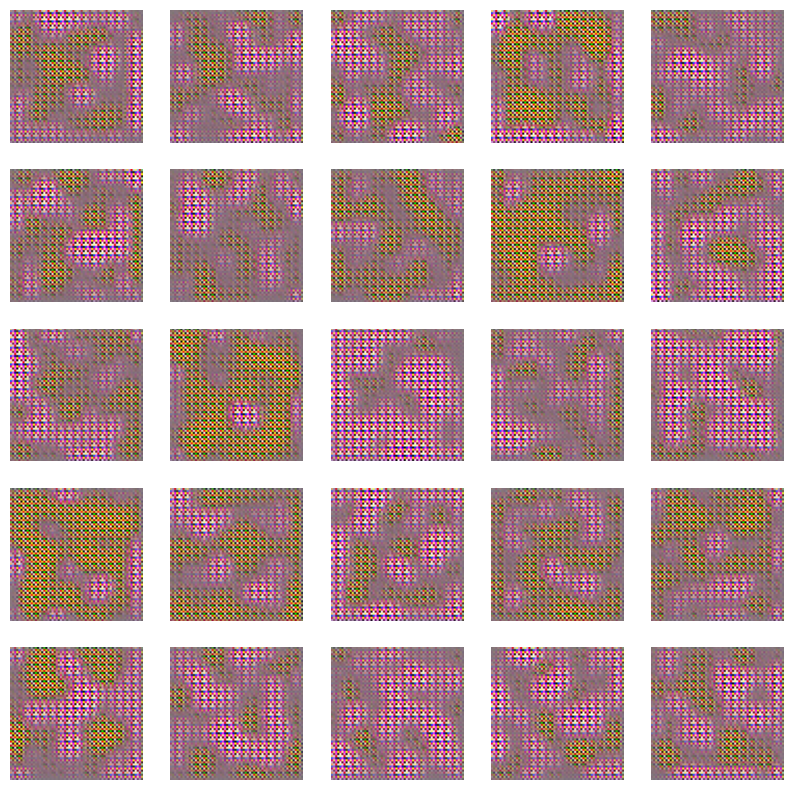

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Define parameters
latent_dim = 100
img_shape = (64, 64, 3)
epochs = 100
batch_size = 32

# Generator model
def build_generator(latent_dim, img_shape):
    model = Sequential()
    model.add(Dense(128 * 16 * 16, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, kernel_size=5, activation='sigmoid', padding='same'))
    return model

# Discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model

# Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim, img_shape)

# Build and compile the GAN model
gan = build_gan(generator, discriminator)

# Training loop
for epoch in range(epochs):
    # Generate random noise as input for the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate fake images
    fake_images = generator.predict(noise)

    # Get a random batch of real images
    real_images = np.random.random((batch_size, *img_shape))

    # Train the discriminator
    discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))

    # Calculate discriminator loss
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train the generator
    gan_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f'Epoch: {epoch+1}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {gan_loss}')

# Generate and visualize a sample of synthetic abstract landscapes
num_samples = 25
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    # Generate random noise as input for the generator
    noise = np.random.normal(0, 1, (1, latent_dim))
    generated_image = generator.predict(noise)[0]

    plt.subplot(5, 5, i+1)
    plt.imshow(generated_image)
    plt.axis('off')
plt.show()